In [1]:
# loading modules for creating models (Tensorflow/Keras Framework)
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

In [2]:
# Loading pre-trained AlexNet model
alexnet = models.alexnet(pretrained=True)

# Free pre-trained layers
for param in alexnet.parameters():
    param.requires_grad = False

c:\Users\Rizwan\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\Rizwan\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
# Mofidying final layer - classifier
num_classes = 8
alexnet.classifier[6] = nn.Linear(alexnet.classifier[6].in_features, num_classes)

In [4]:
# Defining transofrmations of images
transform = transforms.Compose([
    transforms.Resize((227,227)), # Resize to input size of AlexNet
    transforms.ToTensor(), # Convert image to PyTorch Tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize based on ImageNet statistics
])

In [5]:
train_dataset = datasets.ImageFolder(root=r'..\data\train_set', transform=transform)
test_dataset = datasets.ImageFolder(root=r'..\data\test_set', transform=transform)

# Create data loaders to batch the data and shuffle it during training
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [6]:
# Setting up loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(alexnet.classifier[6].parameters(), lr=0.001) # Optimizer for training the classifying layer

Epoch 1, Loss: 0.9240, Accuracy: 0.6951
Epoch 2, Loss: 0.3370, Accuracy: 0.8930
Epoch 3, Loss: 0.2146, Accuracy: 0.9449
Epoch 4, Loss: 0.1691, Accuracy: 0.9632
Epoch 5, Loss: 0.1256, Accuracy: 0.9795
Epoch 6, Loss: 0.1089, Accuracy: 0.9795
Epoch 7, Loss: 0.0845, Accuracy: 0.9849
Epoch 8, Loss: 0.0753, Accuracy: 0.9914
Epoch 9, Loss: 0.0606, Accuracy: 0.9924
Epoch 10, Loss: 0.0621, Accuracy: 0.9924


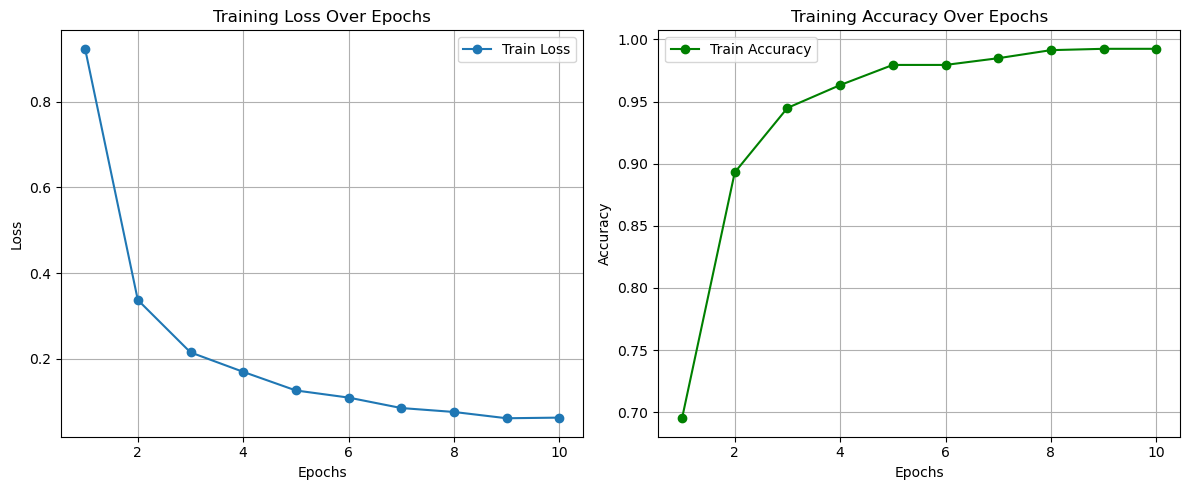

In [7]:
num_epochs = 10

# Initialize lists to store the loss and accuracy values for each epoch
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    alexnet.train()  # Sets model to training mode
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()  # Clears previous gradients
        outputs = alexnet(inputs)  # Forward pass : compute the model output
        loss = criterion(outputs, labels)  # Compute the loss
        loss.backward()  # Backward pass : Compute gradients
        optimizer.step()  # Update model weights

        # Accumulate loss for reporting
        running_loss += loss.item()

        # Accuracy calculations
        _, predicted = torch.max(outputs, 1)  # Get predicted class from outputs
        correct_predictions += (predicted == labels).sum().item()  # Count correct predictions
        total_predictions += labels.size(0)  # Count total predictions

    # Calculate average loss and accuracy for the epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct_predictions / total_predictions

    # Store loss and accuracy values for plotting later
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    # Print the loss and accuracy for this epoch
    print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')

# Plotting the learning curves after training
plt.figure(figsize=(12, 5))

# Plot the training loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs+1), train_losses, marker='o', label='Train Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()

# Plot the training accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs+1), train_accuracies, marker='o', color='green', label='Train Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [10]:
alexnet.eval()  # Set the model to evaluation mode (no dropout, no gradient computation)
correct = 0
total = 0
running_loss = 0.0

with torch.no_grad():  # No need to calculate gradients during evaluation
    for inputs, labels in test_loader:
        outputs = alexnet(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Compute the loss for the batch
        
        # Accumulate the loss
        running_loss += loss.item()

        # Accuracy calculations
        _, predicted = torch.max(outputs, 1)  # Get the predicted class
        total += labels.size(0)  # Increment the total count
        correct += (predicted == labels).sum().item()  # Increment correct predictions

# Calculate the average loss over all batches
average_loss = running_loss / len(test_loader)

# Calculate accuracy
accuracy = 100 * correct / total

print(f'Loss: {average_loss:.4f}, Accuracy: {accuracy:.2f}%')

Loss: 0.1797, Accuracy: 94.87%


In [9]:
with torch.no_grad():  # No need to calculate gradients during evaluation
    for inputs, labels in train_loader:
        outputs = alexnet(inputs)
        _, predicted = torch.max(outputs, 1)  # Get the index of the class with the highest probability
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy: {100 * correct / total}%')

Accuracy: 98.96462467644521%
